## Przedstawienie wyników różnych algorytmów poleceń dla wybranego użytkownika

In [1]:
import pandas as pd
import clustering as cl
movies = pd.read_csv('data/movie.csv')
ratings = pd.read_csv('data/rating.csv')

In [2]:
# wybór użytkownika, dla którego będziemy polecać filmy, oraz ile filmów chcemy wyświetlić
user_id = 23
number_of_movies = 10

## Metoda klasteryzacji algorytmem k-średnich

In [6]:
# Tworzenie klastrów może zająć do około minuty
RS = cl.SystemRekomendacji(ratings, movies)
RS.prepare_clusters()

Termination criterion satisfied


True

In [8]:
recommended_movies = RS.recommend_movies(number_of_movies, user_id)
recommended_movies

,title
0,Raiders of the Lost Ark (Indiana Jones and the...
1,"Godfather, The (1972)"
2,Schindler's List (1993)
3,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
4,Paths of Glory (1957)
5,"Lord of the Rings: The Fellowship of the Ring,..."
6,12 Angry Men (1957)
7,Rear Window (1954)
8,Casablanca (1942)
9,"Godfather: Part II, The (1974)"


## Metoda 2

In [4]:
# kod

## Metoda 3

In [5]:
# kod

## Porównanie zwróconych wyników

In [17]:
# Łączymy ramki danych na podstawie tytułów filmów
merged_df = pd.merge(movies, recommended_movies, on='title', how='inner')

# Grupujemy po gatunkach i liczymy wystąpienia każdego gatunku
genres_counts = movies[movies['title'].isin(merged_df['title'])]['genres'].str.split('|', expand=True).stack().value_counts()

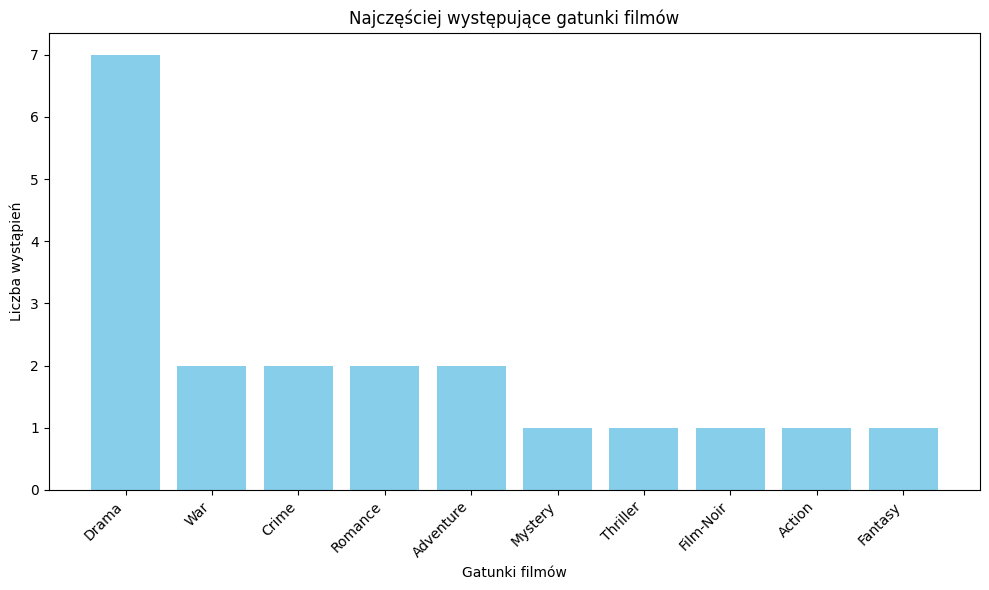

In [16]:
import matplotlib.pyplot as plt
# Tworzymy wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(genres_counts.keys(), genres_counts.values, color='skyblue')
plt.xlabel('Gatunki filmów')
plt.ylabel('Liczba wystąpień')
plt.title('Najczęściej występujące gatunki filmów')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()